In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/Desharnais.csv")


In [3]:
dataset.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [4]:

max_corr_features =  [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']


x=np.array(dataset[max_corr_features])

y=np.array(dataset['Effort'])

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(81,1))
y=scaler.fit_transform(y)

In [6]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=35) 

In [7]:
# import xgboost as xgb
# regr = xgb.XGBRegressor()
# regr.fit(X_train,y_train.ravel())
# y_pred=regr.predict(X_test)

In [8]:
import catboost as cat
from catboost import CatBoostRegressor


regr=CatBoostRegressor()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)


Learning rate set to 0.026519
0:	learn: 0.2026220	total: 146ms	remaining: 2m 25s
1:	learn: 0.2005941	total: 147ms	remaining: 1m 13s
2:	learn: 0.1988849	total: 149ms	remaining: 49.4s
3:	learn: 0.1968031	total: 149ms	remaining: 37.2s
4:	learn: 0.1945729	total: 151ms	remaining: 30s
5:	learn: 0.1927304	total: 152ms	remaining: 25.2s
6:	learn: 0.1909454	total: 154ms	remaining: 21.8s
7:	learn: 0.1894338	total: 155ms	remaining: 19.2s
8:	learn: 0.1875336	total: 156ms	remaining: 17.1s
9:	learn: 0.1856485	total: 158ms	remaining: 15.6s
10:	learn: 0.1840179	total: 160ms	remaining: 14.4s
11:	learn: 0.1823685	total: 161ms	remaining: 13.3s
12:	learn: 0.1804337	total: 162ms	remaining: 12.3s
13:	learn: 0.1788259	total: 164ms	remaining: 11.6s
14:	learn: 0.1770915	total: 166ms	remaining: 10.9s
15:	learn: 0.1751719	total: 167ms	remaining: 10.3s
16:	learn: 0.1734759	total: 169ms	remaining: 9.78s
17:	learn: 0.1720139	total: 172ms	remaining: 9.37s
18:	learn: 0.1704755	total: 174ms	remaining: 8.97s
19:	learn: 

In [9]:
y_pred=np.reshape(y_pred,(17,1))
y_test=np.reshape(y_test,(17,1))

In [10]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [11]:
y_pred

array([[0.13285145],
       [0.03594228],
       [0.23202543],
       [0.1132063 ],
       [0.05540094],
       [0.03719325],
       [0.58819625],
       [0.23226545],
       [0.14839808],
       [0.06375094],
       [0.03934048],
       [0.14282794],
       [0.48146493],
       [0.22086494],
       [0.1352918 ],
       [0.04733126],
       [0.09096489]])

In [12]:
y_test

array([[0.15499701],
       [0.07630162],
       [0.22351885],
       [0.11071215],
       [0.01286655],
       [0.14781568],
       [0.07719928],
       [0.15948534],
       [0.12507481],
       [0.10442849],
       [0.03081987],
       [0.19688809],
       [0.22800718],
       [0.17414722],
       [0.07390784],
       [0.0855775 ],
       [0.14392579]])

In [13]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [14]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.021312468101943288

RMSE:
 0.14598790395763372

MAPE:
 94.2029637128594

SMAPE:
 53.31

 Adj R2 score:
 -147.51466405702274


In [15]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [16]:
y_test=np.reshape(y_test,(17,))
y_pred=np.reshape(y_pred,(17,))

In [17]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0          4172.0       3653.926788
1          2331.0       1386.833664
2          5775.0       5974.002809
3          3136.0       3194.348233
4           847.0       1842.049647
5          4004.0       1416.098969
6          2352.0      14306.262979
7          4277.0       5979.617966
8          3472.0       4017.624574
9          2989.0       2037.389501
10         1267.0       1466.331172
11         5152.0       3887.316923
12         5880.0      11809.390549
13         4620.0       5712.914502
14         2275.0       3711.016289
15         2548.0       1653.267595
16         3913.0       2674.032752


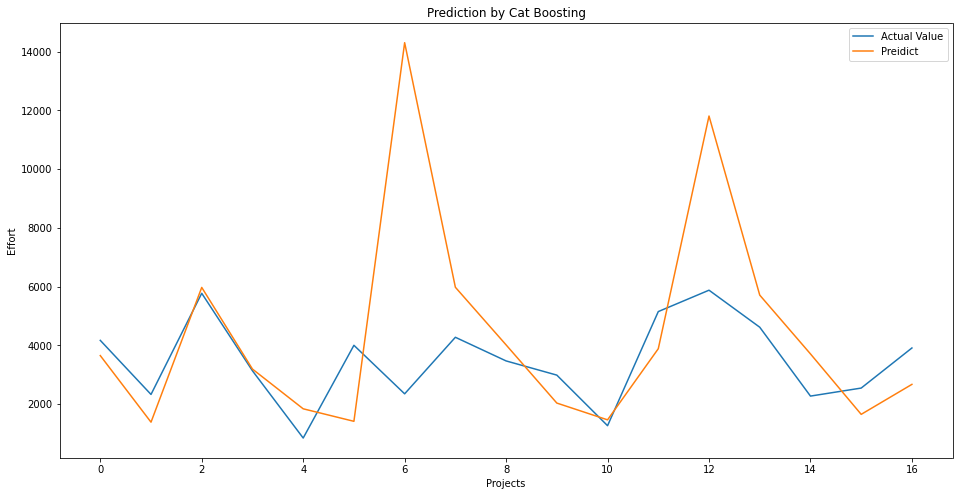

In [18]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Cat Boosting")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()